In [1]:
# Import the necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from ray.rllib.algorithms.algorithm import Algorithm
import trading_env

# Import the policy
algo = Algorithm.from_checkpoint("C:/Users/brand/AppData/Local/Temp/tmpkap_4ue5")

2024-07-08 11:29:07,508	WARNING deprecation.py:50 -- DeprecationWarning: `_enable_new_api_stack` has been deprecated. Use `AlgorithmConfig._enable_new_api_stack` instead. This will raise an error in the future!
2024-07-08 11:29:07,509	WARNING deprecation.py:50 -- DeprecationWarning: `AlgorithmConfig.num_cpus_per_worker` has been deprecated. Use `AlgorithmConfig.num_cpus_per_env_runner` instead. This will raise an error in the future!
2024-07-08 11:29:07,509	WARNING deprecation.py:50 -- DeprecationWarning: `AlgorithmConfig.num_gpus_per_worker` has been deprecated. Use `AlgorithmConfig.num_gpus_per_env_runner` instead. This will raise an error in the future!
2024-07-08 11:29:07,510	WARNING deprecation.py:50 -- DeprecationWarning: `AlgorithmConfig.num_learner_workers` has been deprecated. Use `AlgorithmConfig.num_learners` instead. This will raise an error in the future!
2024-07-08 11:29:07,510	WARNING deprecation.py:50 -- DeprecationWarning: `AlgorithmConfig.num_cpus_per_learner_worker` 

In [7]:
# Initalize environment
env = trading_env.TradingEnv(env_config=None)
state, info = env.reset(options={
    "ticker" : "QQQ",
    "starting_equity" : 100,
    "start_timestamp" : 933255000,
})
print("start_timestamp:", info["start_timestamp"])
state_dict = trading_env.unflatten_dictarr(state)

# Intialize df columns
close = [state_dict["close"][-1]]
cash = [state_dict["cash"]]
long = [state_dict["long"]]
equity = [state_dict["cash"] + state_dict["long"]*(state_dict["close"][-1])]
annotations = [0,]

start_timestamp: 933255000.0


In [8]:
terminated = truncated = False
i = 0
while not (terminated or truncated):
    action = algo.compute_single_action(state)
    state, reward, terminated, truncated, _ = env.step(action)
    state_dict = trading_env.unflatten_dictarr(state)
    i += 1
    
    price = state_dict["close"][-1]
    close.append(price)
    cash.append(state_dict["cash"])
    long.append(state_dict["long"])
    equity.append(state_dict["cash"] + state_dict["long"]*price)
    annotations.append(action[0])
print("terminated:", terminated)
print("truncated:", truncated)

terminated: True
truncated: False


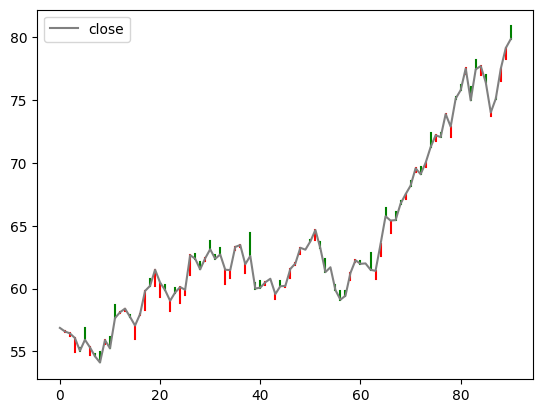

In [9]:
timeline = np.arange(len(close))

for i in timeline:
    segment_x = [i, i]
    segment_y = [close[i], close[i] + annotations[i]]
    if annotations[i] > 0: plt.plot(segment_x, segment_y, color="green")
    elif annotations[i] < 0: plt.plot(segment_x, segment_y, color="red")
plt.plot(timeline, close, color="gray", label="close")

plt.legend()
plt.show()

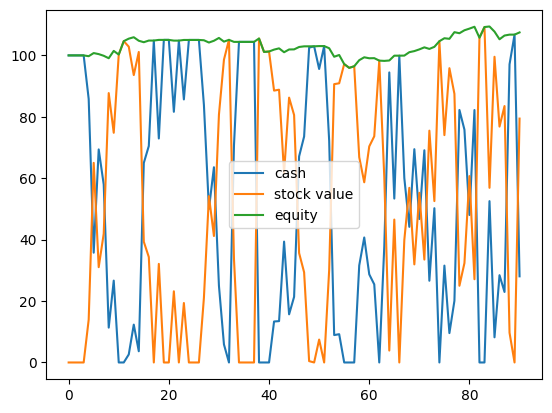

In [10]:
plt.plot(np.arange(len(close)), cash, label="cash")
plt.plot(np.arange(len(close)), np.array(long) * np.array(close), label="stock value")
plt.plot(np.arange(len(close)), equity, label="equity")
plt.legend()
plt.show()

In [11]:
print("Change in equity: %.3f%%" % ((equity[-1]/equity[0]-1)*100))

Change in equity: 7.480%
